# Deep Reinforce Learning Overview

Reinforcement Learning: An Introduction
   
2nd Edition Completed Draft, by Richard S. Sutton and Andrew G. Barto
   
http://incompleteideas.net/book/bookdraft2018jan1.pdf

In [1]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import gym
import numpy as np

## The Origins of Reinforcement Learning

When it comes to analyzing the origins of modern Reinforcement Learning, there are three separate starting points that eventually merge to form what we know today: Optimal Control, Trial and Error through Animal Learning, and, less prevalent, Temporal-Difference Methods. First we will be starting with optimal control.

Around the mid-1950s, Richard Bellman and others tackled the problem of "optimal control", described as minimizing a metric of a constantly changing enviroment over time. By combining the system's own state and a value function, optimized for a certain return goal, they were able to create a functional equation, one that is now known as the Bellman equation (Maybe have an explanation of that now?).

This marks the beginning of what we now know as dynamic programming, the process of solving complex problems by breaking them down into subproblems and building upon each smaller solved one. Bellman also is credited with creating the Markovian decision process (MDPs) while Ronald Howard added on to MDPs by making the policy iteration method for them.

(Note, a stochastic or random process is a mathematical object usually defined as a collection of random variables. If the state space is the integers or natural numbers, then it is discrete stochastic)
 
The next major part is trial and error through animal learning, a practice, that according to American spychologist R. S. Woodworth, goes as far back as the late 1850s. One of the first few to truly recognize the concept of trial-and-error was Edward Thorndike, an American psychologist that worked extensively on comparitive psychology and the learning process. He initially stated what is now know as "The Law of Effect", a law that describes the correlation between reinforcing events and choosing actions. Over time, the theory was adapted to and laid the foundations for many professionals in the field, such as Pavlov and B. F. Skinner. 

(talk about Turing, advancements in analog RL techniques)
In 1948, Alan Turing described a "pleasure-pain system"

However, due to a lot of confusion in the previous decades due to people using the words reinforcement learning and other types of learning (such as perceptual and supervised) as synonyms, there was a period of silence where development in the field proved slow. Although, there were some exceptions to this trend. The terms "reinforcement" and "reinforcement learning" were actually used in scientific literature for the first time. This is also the time period where Minksky's paper "Steps Toward Artificial Intelligence" that talked about the problem of "How  do  you  distribute  credit  for  success  among  the  many  decisions  that  may  have  been involved in producing it?". Many topics in this paper are still relevant today. Some other examples are the system STeLLA by John Andreae and MENACE by Donald Michie.

One person in particular who is attributed to reviving the field is Harry Klopf, who recognized that there were characteristics of "adaptive behavior" that were being fully ignored. The idea he proposed was the drive to reach a goal in the enviroment, to have a clear desired outcome and undesired end. Eventually, this push evolved into the official distinction between supervised and reinforcement learning.

As mentioned previously, this is the third and last part regarding the origins of reinforcement learning: temporal-difference learning. This type of learning can best be described as (). The origins of this concept can be attributed to animal learning psychology, specifically in the idea of secondary reinforcers. A second reinforcer is a stimulus that has been passively associated with with a primary reinforer (example needed) and thus has a similar effect. 

(Sutton work)

In 1989, Chris Watkin's converged the major parts discussed before into developing Q-Learning.


## States and Actions

![alt text](images/states_actions.png)

The first core concept we will cover is the understanding of what states and actions are. Reinforcement learning is a type of machine learning that is agent-oriented; it relies on its enviroment rather than a teacher to achieve its desired goal. This is similar to how humans learn, through the steps of trial and error.

Let's take for example a person learning to navigate a maze. A state can compropise of any crossroad they are met with, an action is defined as a choice/direction they choose to go, and the goal (reward) is defined as them reaching the end of the maze.

As the person navigates the maze, they will naturally discover that some paths are less optimal than others, while some do not ever reach the end. Ideally, over time, they would be able to navigate the most optimal path every time. And this is what we are trying to achieve.

## Markov Decision Process 

Building on top of states and actions is the next step, a Markov Decision Process (MDP). A MDP can be simplified to a tuple containing 5 parts:
   
S - set of states   
A - set of actions   
P - probability that an action *a* at state *s* at time *t* will get to state *s + 1* at time *t + 1*   
R - reward received after moving from state *s* to state *s + 1*   
$\gamma$ - discount factor that can optimize future rewards vs present rewards
   
Each of these play a role in determining a final "policy" $\pi$; a rule that says given a state *s*, action *a* will be taken.

![alt text](images/markov.png)

This is the standard relationship between an Agent and the Enviroment in a MDP. An agent is the one who learns and makes decision while the enviroment is everything outside of the agent. These two variables constantly interact and feed each other data, with the enviroment supplying the agent with rewards and the agent triggering the effects of the enviroment.

*(Not sure if I want to include this or not, talks about why the distribution of S and R is only dependent on the prior state and action values).*
$$p({s',r | s,a}) \doteq P\{S_t = s', R_t = r | S_{s-1} = s , A_{t-1} = a\}$$
   
What this equation states, is that in a *finite* MDP, there are a limited number of states, actions, and rewards. Because of this, we can discern that the random variables R and S have a probability distribution based only 

## Q-Learning

This brings us to building our first algorithm, Q-Learning. Given a state s, and an action a, the Q function returns an estimate of the total reward starting from s and taking a.

Let's go over the formula:   
 
$$Q({s_t, a_t}) \leftarrow Q({s_t, a_t}) + \alpha[r_{t+1} +\gamma\max_a Q(s_{t+1}, a) - Q(s_t, a_t)]$$
   
$\alpha$ - the learning rate, typically a small value between 0 and 1, indicates how much we update over values every time we take an action. Typically this value tends to be smaller in order not to overrepresent certain action. However it can also be 1, so that the $Q(s_t, a_t)$ terms cancel out (this is done in DQN).
    
$\gamma$ - discount factor, encourages an agent to seek a reward sooner than later, typically set to .9~.99, makes agents receive a smaller reward in the present to give better incentive for future rewards. The effect of the discount factor can be seen when the Bellman equation is expanded, and $\alpha = 1$.

$$Q({s_t, a_t}) = r_0 + \gamma r_1 + \gamma^2 r_2 + \gamma^3 r_ 3 ... $$
$$Q({s_t, a_t}) = r_0 + \gamma(r_1 + \gamma^2 r_2 + \gamma^3 r_ 3 ...) = r_0 + \gamma\max_a Q(s_{t+1}, a )$$

<img src="images/q.png" width="400">

Given this formula, you need the apply it using the following steps:
1. Set initial value of *Q(s, a)* to all abritary values.   
2. Eventually while reaching the limit, make sure to do all actions *a* for all states *s*.
3. At each time *t*, change one element.
4. You could reduce the $\alpha$ element over time for optimization purposes.   

In order to better visualize this process, we will be going through a sample example based on a program running in OpenAI, something that will be helpful in your exploration of the topic. We will go into more detail on it after this.
   
### Example
First, we create the enviroment. In this case, it is Taxi-v2, an enviroment with the following rules:

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. 
You receive +20 points for a successful dropoff.
Lose 1 point for every timestep it takes. 
10 point penalty for illegal pick-up and drop-off actions.

In [2]:
env = gym.make("Taxi-v2")

In [3]:
#in order to start enviroment, we reset it
#number returned shows initial RANDOM state between 0-499
env.reset()

112

In [4]:
#shows total state range
env.observation_space.n

500

In the image below there are a couple of things to point out:
1. Yellow square represents the taxi.
2. "|" represents a wall.
3. Blue letter represents pick-up location.
4. Purple Letter is drop-off location.

In [5]:
#shows the number of actions. down (0), up (1), right (2), left (3), pick-up (4), and drop-off (5)
env.action_space.n

6

In [6]:
#override state to 114 for tutorial purposes
env.env.s = 114
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
#returns four variables, labeled as state, reward, done, info, in that order 
env.step(1)

(14, -1, False, {'prob': 1.0})

In [8]:
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [9]:
#iterate through the enviroment and attempt to solve it through random choosing considering you only need 20 points to win
state = env.reset()
counter = 0
reward = None
while reward != 20:
    state, reward, done, info = env.step(env.action_space.sample())
    counter += 1

print(counter)

3142


In [10]:
#Form Q table to store values in, 500 * 6, states * actions
#alpha assigned randomly
Q = np.zeros([env.observation_space.n, env.action_space.n])
G = 0
alpha = 0.618

(Need to rewrite)
Actual Q learning algorithm breakdown:

First (#1): The agent starts by choosing an action with the highest Q value for the current state using argmax. Argmax will return the index/action with the highest value for that state. Initially, our Q table will be all zeros. But, after every step, the Q values for state-action pairs will be updated.

Second (#2): The agent then takes action and we store the future state as state2 (St+1). This will allow the agent to compare the previous state to the new state.

Third (#3): We update the state-action pair (St , At) for Q using the reward, and the max Q value for state2 (St+1). This update is done using the action value formula (based upon the Bellman equation) and allows state-action pairs to be updated in a recursive fashion (based on future values). See Figure 2 for the value iteration update.

In [11]:
for episode in range(1,1001):
    done = False
    G, reward = 0,0
    state = env.reset()
    while done != True:
        action = np.argmax(Q[state]) #1
        state2, reward, done, info = env.step(action) #2
        Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
        G += reward
        state = state2    
    if episode % 50 == 0:
        print('Episode {} Total Reward: {}'.format(episode,G))

Episode 50 Total Reward: -147
Episode 100 Total Reward: -130
Episode 150 Total Reward: -171
Episode 200 Total Reward: 7
Episode 250 Total Reward: 3
Episode 300 Total Reward: 12
Episode 350 Total Reward: 7
Episode 400 Total Reward: 13
Episode 450 Total Reward: 2
Episode 500 Total Reward: 7
Episode 550 Total Reward: 9
Episode 600 Total Reward: 5
Episode 650 Total Reward: 4
Episode 700 Total Reward: 6
Episode 750 Total Reward: 5
Episode 800 Total Reward: 12
Episode 850 Total Reward: 9
Episode 900 Total Reward: 10
Episode 950 Total Reward: 10
Episode 1000 Total Reward: 10


(Need to rewrite)
Following this update, we update our total reward G and update state (St) to be the previous state2 (St+1) so the loop can begin again and the next action can be decided.

After so many episodes, the algorithm will converge and determine the optimal action for every state using the Q table, ensuring the highest possible reward. We now consider the environment problem solved.

## OpenAI Gym
<img src="images/anakin.png" width="400">
OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms. This is the gym open-source library, which gives you access to a standardized set of environments.

### Example
The following is an example of the game Breakout, and a gif recording of it playing a couple of times. The code is simple and easy to follow so you can get a good idea of what's going on.

In [12]:
#taken from http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
#env = gym.make('CartPole-v0')
env = gym.make('Breakout-v0')


# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(1000):
    # Render into buffer. 
    # You will still see the window.
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
        
#getting error with (close = True) parameter
env.render()

True

Displays enviroment already record and in GIF form. Technically supposed to not open up on your computer, but have not fixed bug yet.


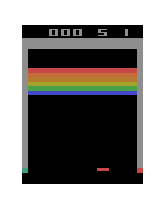
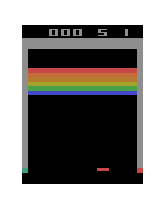
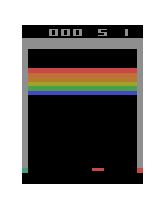
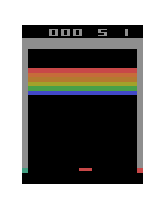
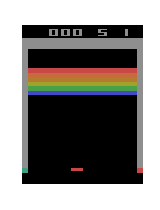
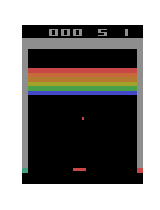
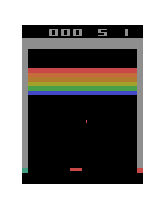
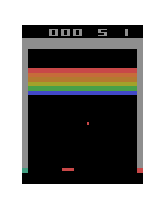
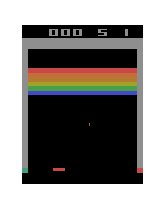
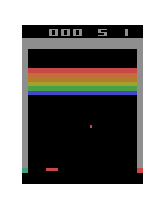
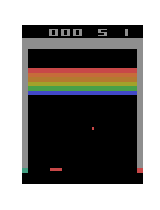
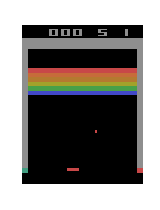
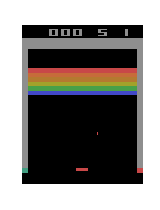
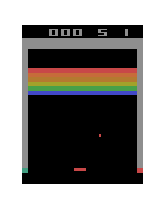
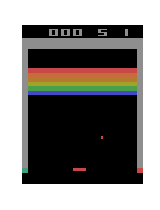
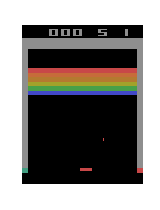
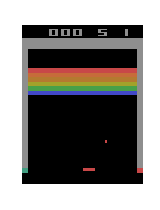
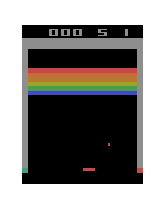
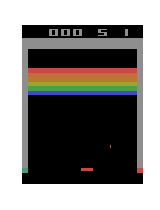
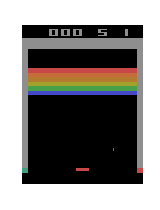
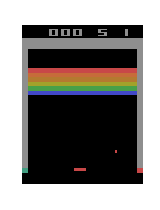
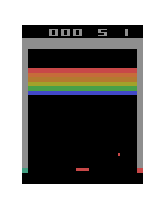
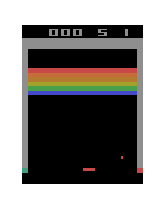
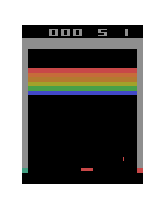
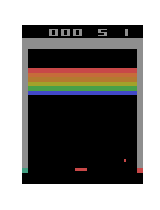
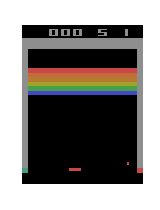
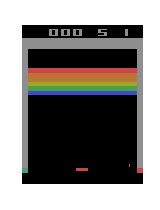
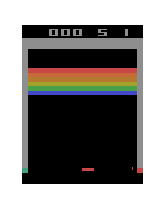
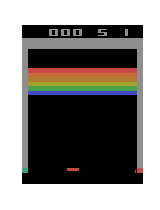
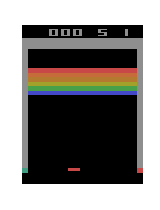
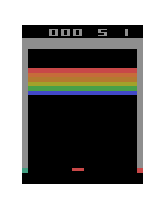
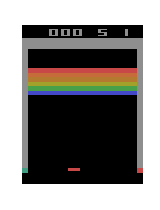
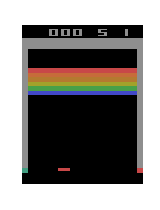
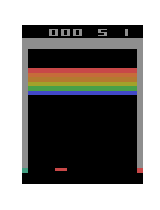
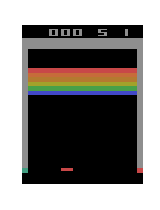
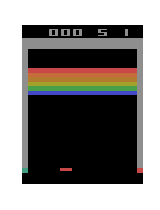
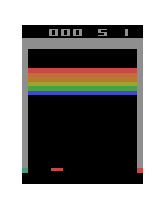
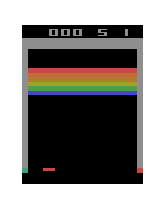
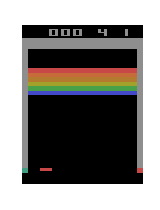
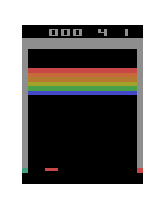
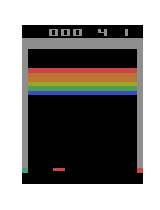
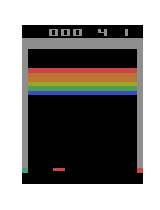
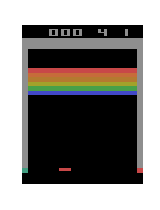
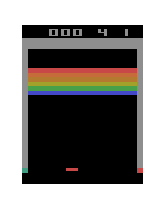
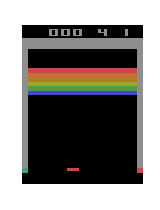
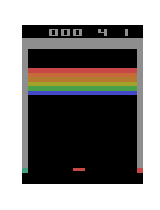
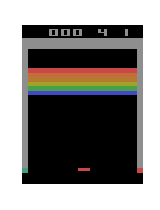
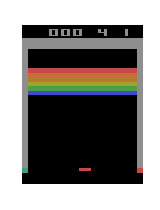
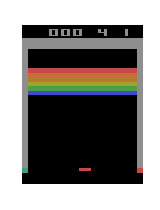
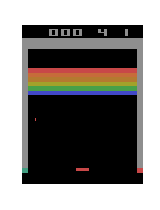
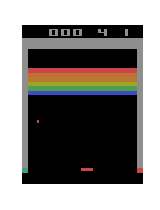
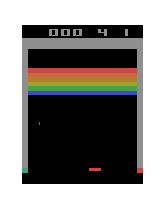
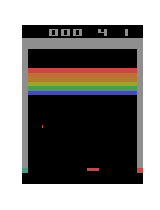
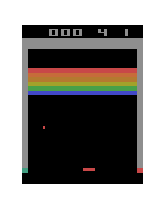
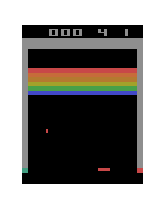
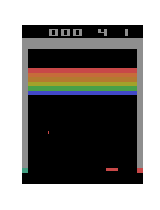
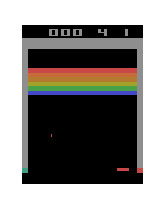
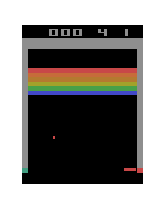
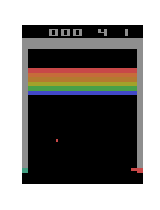
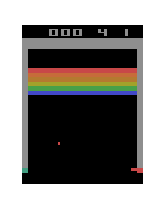
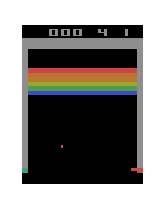
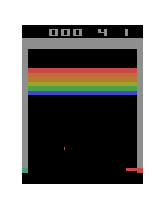
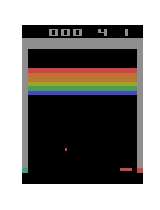
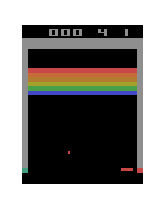
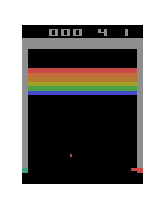
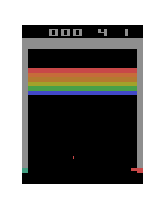
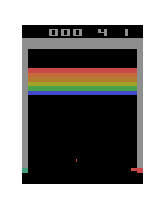
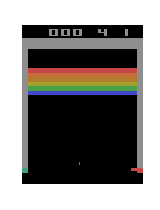
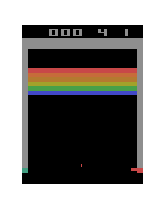
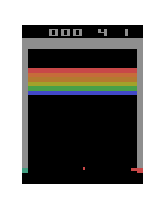
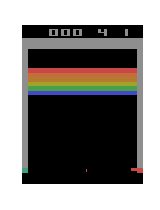
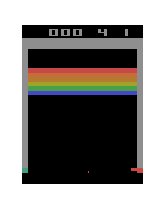
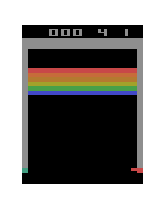
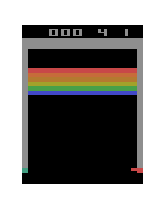
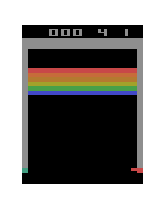
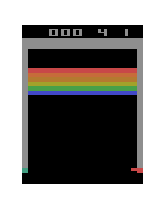
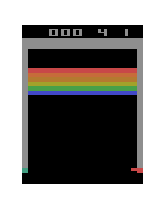
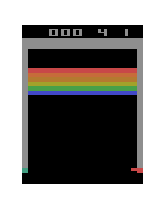
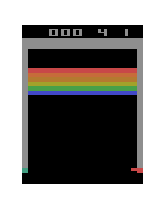
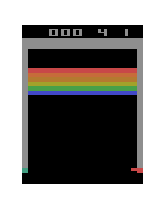
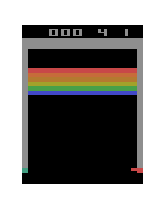
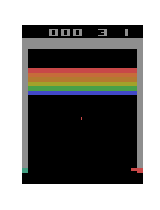
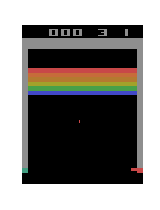
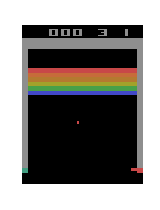
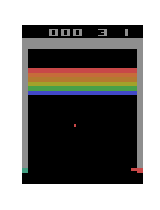
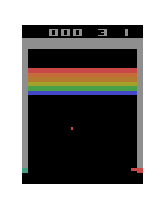
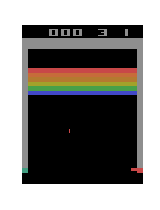
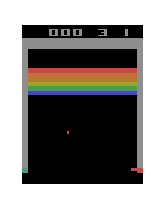
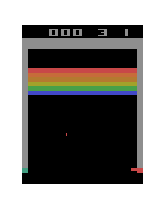
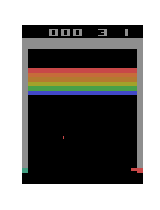
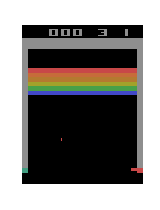
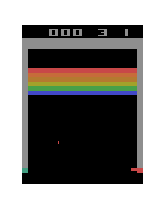
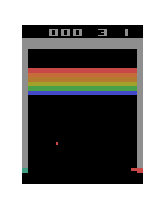
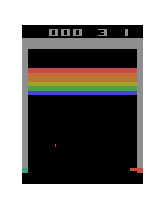
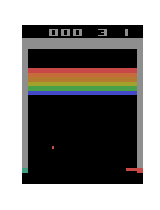
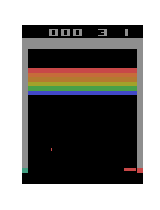
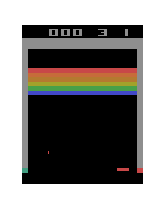
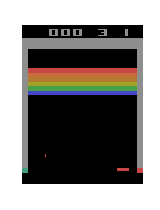
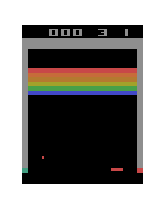
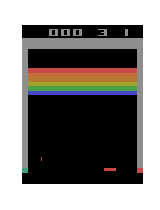
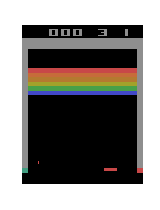
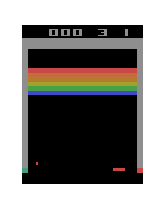
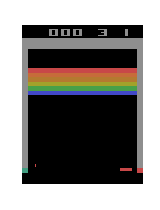
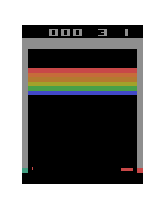
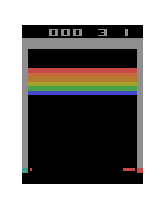
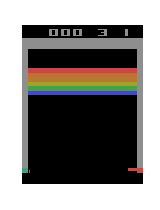
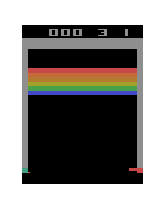
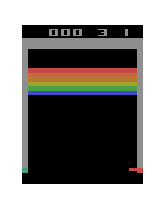
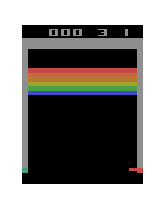
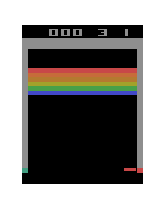
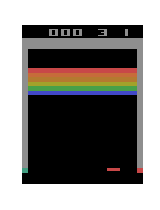
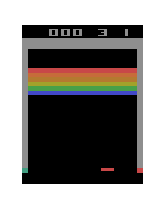
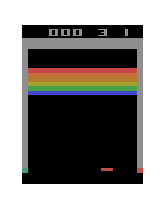
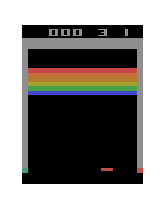
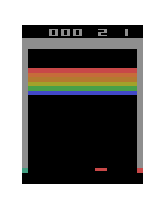
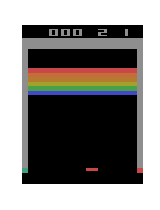
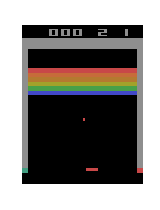
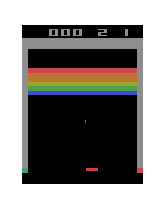
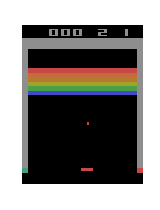
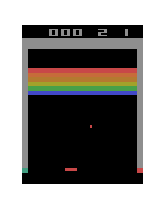
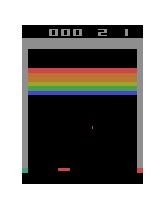
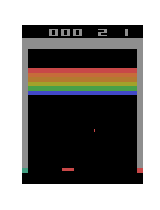
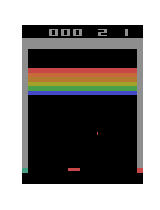
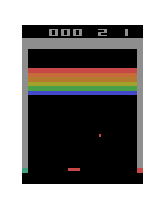
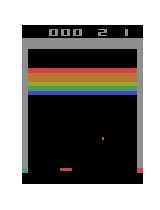
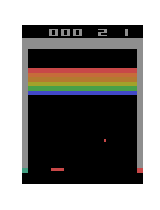
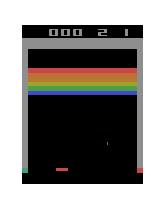
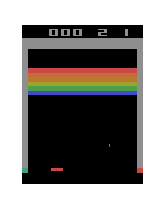
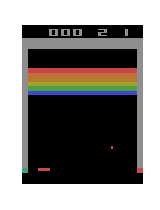
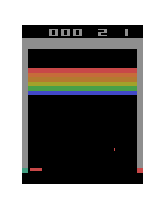
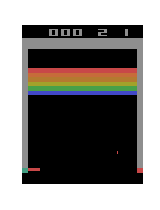
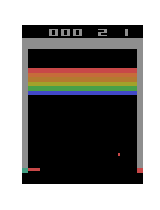
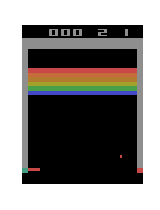
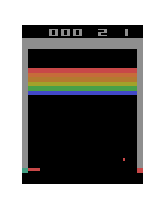
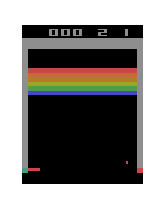
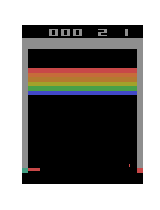
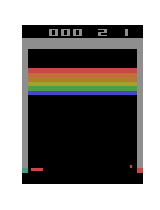
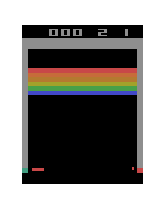
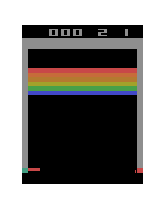
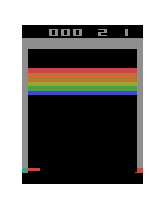
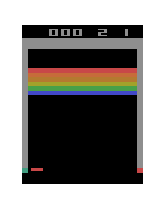
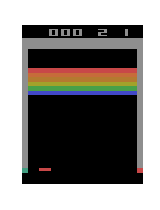
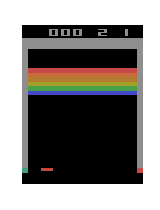
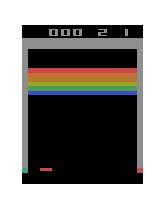
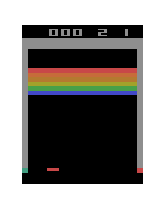
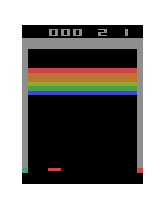
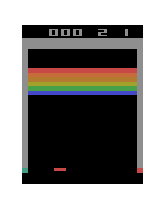
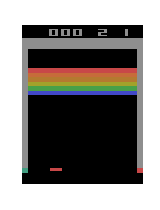
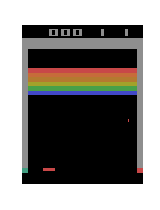
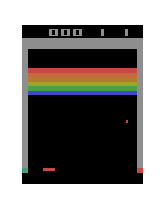
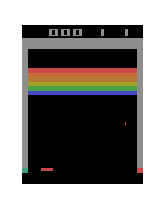
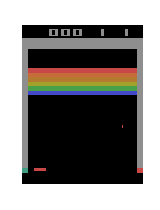
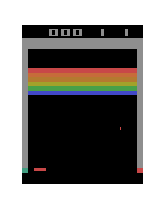
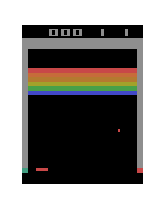
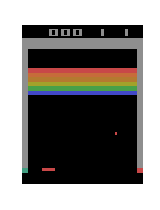
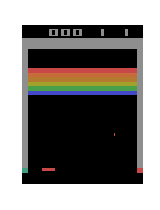
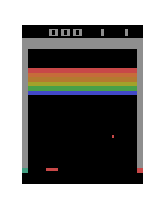
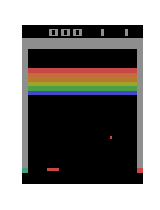
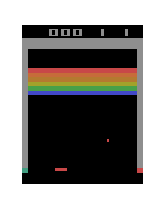
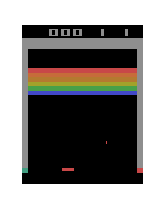
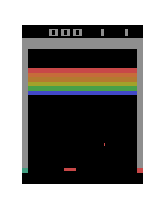
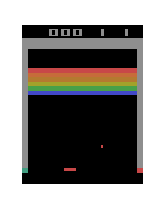
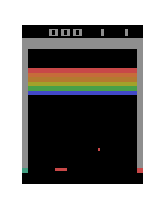
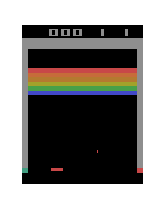
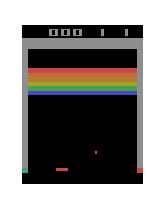
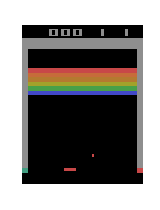
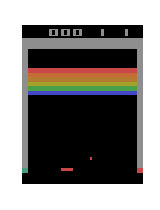
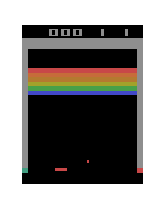
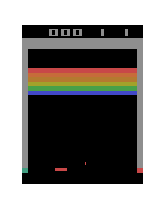
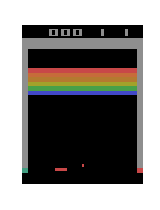
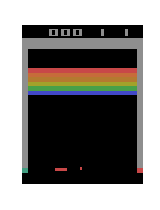
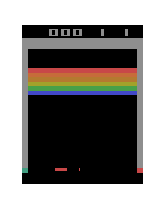
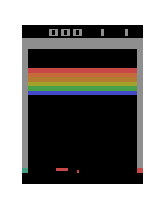
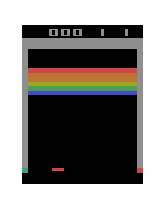
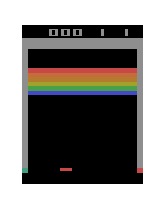
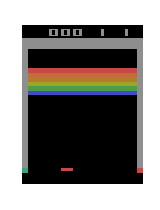
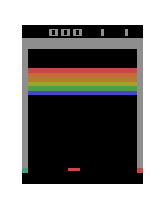
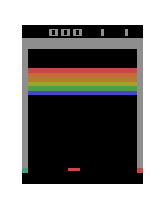
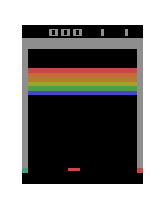
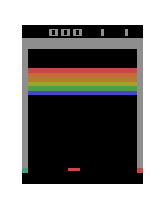
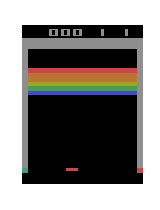
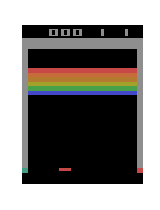

In [13]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

display_frames_as_gif(frames)

In [15]:
import gym
import numpy as np
import random

"""QLEARN CLASS NOT MY CODe"""
class QLearn:
    def __init__(self, actions, epsilon, alpha, gamma):
        self.q = {}
        self.epsilon = epsilon  # exploration constant
        self.alpha = alpha      # discount constant
        self.gamma = gamma      # discount factor
        self.actions = actions

    def load_q(self, new_q):
        self.q = new_q

    def getQ(self, state, action):
        return self.q.get(str(state)+ action, 0.0)

    def learnQ(self, state, action, reward, value):
        '''
        Q-learning:
            Q(s, a) += alpha * (reward(s,a) + max(Q(s') - Q(s,a))
        '''
        oldv = self.q.get(str(state) + action, None)
        if oldv is None:
            self.q[str(state)+ action] = reward
        else:
            self.q[str(state)+ action] = oldv + self.alpha * (value - oldv)

    def chooseAction(self, state, return_q=False):
        q = [self.getQ(state, a) for a in self.actions]
        maxQ = max(q)

        if random.random() < self.epsilon:
            minQ = min(q); mag = max(abs(minQ), abs(maxQ))
            # add random values to all the actions, recalculate maxQ
            q = [q[i] + random.random() * mag - .5 * mag for i in range(len(self.actions))]
            maxQ = max(q)

        count = q.count(maxQ)
        # In case there're several state-action max values
        # we select a random one among them
        if count > 1:
            best = [i for i in range(len(self.actions)) if q[i] == maxQ]
            i = random.choice(best)
        else:
            i = q.index(maxQ)

        action = self.actions[i]
        if return_q: # if they want it, give it!
            return action, q
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

EPSILON=.5
ALPHA=.4
GAMMA=1

env = gym.make("BinaryCarRacing-v0")
env.reset()

action_list = [
    "steer_left",
    "steer_right",
    "gas_on",
    "gas_off",
    "brake_on",
    "brake_off"
]

def assign_val(x, index, val):
    x[index] = val
    return x

action_effects = {
    "steer_left":     lambda x: assign_val(x, 0, -1),
    "steer_straight": lambda x: assign_val(x, 0, 0),
    "steer_right":    lambda x: assign_val(x, 0, 1),
    "gas_on":         lambda x: assign_val(x, 1, 1),
    "gas_off":        lambda x: assign_val(x, 1, 0),
    "brake_on":       lambda x: assign_val(x, 2, 1),
    "brake_off":      lambda x: assign_val(x, 2, 0)
}

agent = QLearn(
    actions=action_list,
    epsilon=EPSILON,
    alpha=ALPHA,
    gamma=GAMMA
)

max_reading = 0

import math
def convert_to_discrete(reading, max_reading):
    if reading == 0 or reading == -1:
        return -1
    return math.floor(reading/max_reading * 5)

for iteration in range(100):
    action = np.array([0, 0, 0])
    action_chosen = None
    state = None
    step_reward = None
    done = False
    while not done:
        new_state, step_reward, done, _ = env.step(action)
        for reading in new_state:
            if reading > max_reading:
                max_reading = reading
        new_state = list(map(lambda x: convert_to_discrete(x, max_reading), new_state))
        if state:
            agent.learn(state, action_chosen, step_reward, new_state)
        action_chosen = agent.chooseAction(new_state)
        action = action_effects[action_chosen](action)
        state = new_state
        if iteration % 10 == 0:
            env.render()
    env.reset()

import json
with open("./agent_q.agent", "w+") as f:
    f.write(json.dumps(agent.q))

UnregisteredEnv: No registered env with id: BinaryCarRacing-v0

## References

Image #1: http://slideplayer.com/slide/2342696/

Image #2: Title Book

Image #3: https://www.analyticsvidhya.com/blog/2017/01/introduction-to-reinforcement-learning-implementation/

Youtube: https://youtu.be/ggqnxyjaKe4

Youtube: https://youtu.be/3T5eCou2erg

Code/Content: https://github.com/dennybritz/reinforcement-learning

Code/Content #2:https://github.com/vmayoral/basic_reinforcement_learning

Code/Content #3:https://www.oreilly.com/learning/introduction-to-reinforcement-learning-and-openai-gym